<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [4]:
print(np.float32(12.123452) - np.float32(12.123450))
dif=np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002

error=(abs(dif-valor_real)/valor_real)*100

print(error)
#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


In [5]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [6]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [7]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [8]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [9]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [10]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [11]:
def exp(x,n):
    exp=0
    for i in range(n):
        exp+=((-1)**i)*(x**i/factorial(i))
    
    return exp

x=0.1
n=10
e1=exp(x,n)
e_exact=np.exp(-x)

print(
    f'''
    {e1}
    {e_exact}
    ''')


    0.9048374180359596
    0.9048374180359595
    


In [12]:
def expt(x,n):
    ex=exp(x,n)
    tresh=abs(1e-17*ex)

    exp_=0
    for i in range(n):
        exp_=abs((-x)**(i+1)/factorial(i+1))
        if exp_<=tresh:
            break
    return exp(x,i),i

x=9.99999           #para estos valores cada serie se vuelve loca y comienza a diferir bruscamente
n=9
print(
    f'''
    {exp(x,n)} valor de la serie
    {expt(x,n)} valor de la serie truncada
    {np.exp(-x)} valor de la serie exacta''')


    1342.5759259153438 valor de la serie
    (-1137.5629630429898, 8) valor de la serie truncada
    4.540038376405246e-05 valor de la serie exacta


In [13]:
def inv(x,n):
    exp=0
    for i in range(n):
        exp+=x**i/factorial(i)
    return 1/exp

x=0.1
n=100
print(
    f'''
    {exp(x,n)} valor de la serie
    {inv(x,n)} valor de la serie invertida
    {np.exp(-x)} valor de la serie exacta''')


    0.9048374180359596 valor de la serie
    0.9048374180359599 valor de la serie invertida
    0.9048374180359595 valor de la serie exacta


In [14]:
N=np.arange(1,20,1)

exp1=np.zeros(len(N))
exp2=np.zeros(len(N))

for i,n in enumerate(N):
    exp1[i]=exp(x,n)
    exp2[i]=inv(x,n)

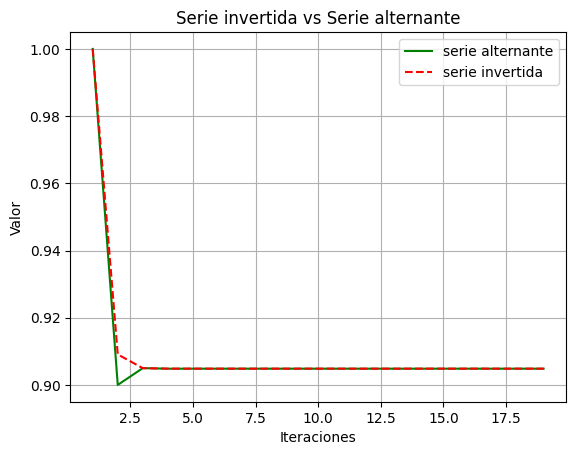

In [15]:
plt.figure()
plt.plot(N,exp1,'g-',label='serie alternante')
plt.plot(N,exp2,'r--',label='serie invertida')
plt.legend()
plt.ylabel('Valor')
plt.title('Serie invertida vs Serie alternante')
plt.xlabel('Iteraciones')
plt.grid()

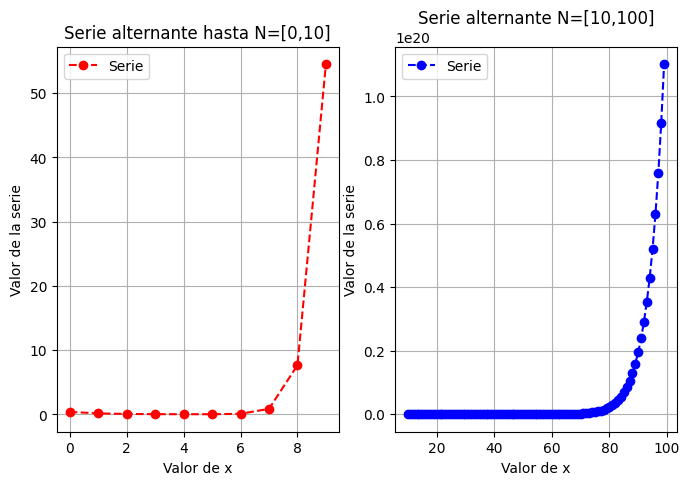

In [16]:
E1=np.zeros(10)
for _,i in enumerate(range(1,11)):
    E1[_]=exp(i,n)

E2=np.zeros(90)
for _,j in enumerate(range(10,100)):
    E2[_]=exp(j,n)

x=np.arange(0,10,1)
x1=np.arange(10,100,1)

fig,axes=plt.subplots(1,2,figsize=(8,5))

axes[0].plot(x,E1,'ro--',label='Serie')
axes[0].set_title('Serie alternante hasta N=[0,10]')
axes[0].set_xlabel('Valor de x')
axes[0].set_ylabel('Valor de la serie')
axes[0].grid()
axes[0].legend()

axes[1].plot(x1,E2,'bo--',label='Serie')
axes[1].set_title('Serie alternante N=[10,100]')
axes[1].set_xlabel('Valor de x')
axes[1].set_ylabel('Valor de la serie')
axes[1].grid()
axes[1].legend()


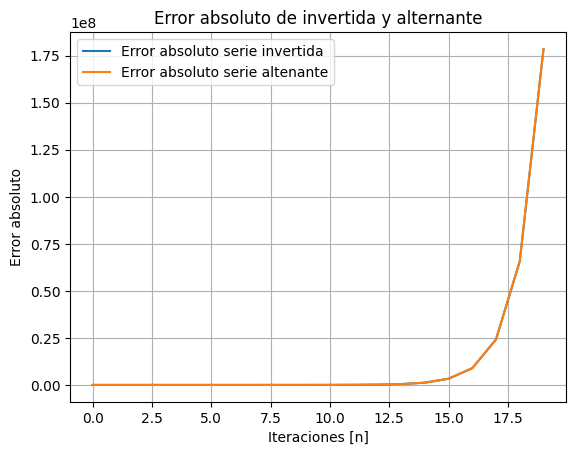

In [31]:
n1=20
x=np.arange(0,n1,1)     #distintos valores de x
err_inv=np.zeros(len(x))
err_alt=np.zeros(len(x))

for o,i in enumerate(x):
    err_inv[o]=abs((np.exp(i)-inv(i,n1)))
    err_alt[o]=abs((np.exp(i)-exp(i,n1)))

plt.plot(x,err_inv,label='Error absoluto serie invertida')
plt.plot(x,err_alt,label='Error absoluto serie altenante')
plt.title('Error absoluto de invertida y alternante')
plt.xlabel('Iteraciones [n]')
plt.ylabel('Error absoluto')
plt.grid()
plt.legend()

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-

\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




(0.3066030068151212, 0.3066030068151212, 0.30660300681512476)

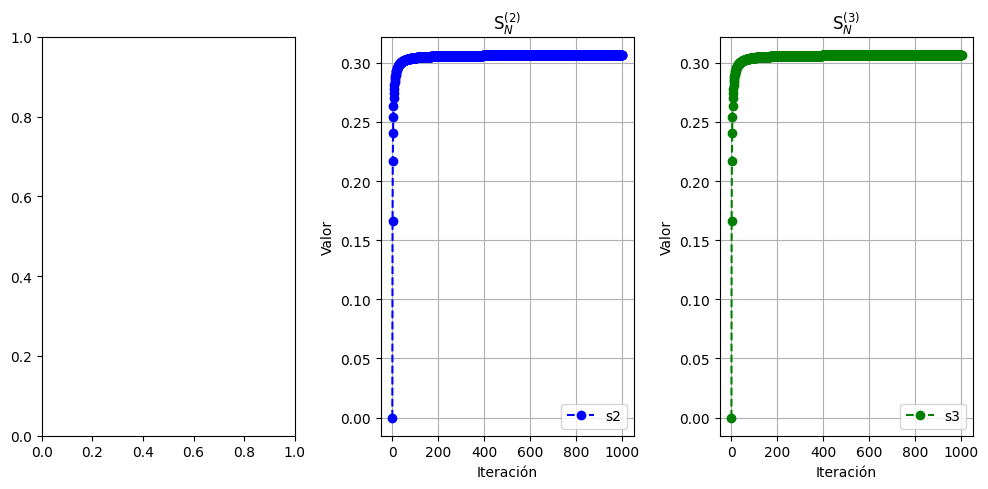

In [18]:
n=1000 #Este es el N que manda todo

s1=0
y1=np.zeros(2*n+1)
for i in range(1,2*n+1):
    s1+=((-1)**i)*(i/(i+1))
    y1[i]=s1


s2=0
y2=np.zeros(n+1)
for j in range(1,n+1):
    s2+=((2*j)/(2*j+1))-((2*j-1)/(2*j))
    y2[j]=s2


s3=0
y3=np.zeros(n+1)
for k in range(1,n+1):
    s3+=1/(2*k*(2*k+1))
    y3[k]=s3

x=np.arange(1,n+2,1)
x1=np.arange(1,2*n+2,1)
fig,axes=plt.subplots(1,3,figsize=(10,5))

#axes[0].plot(x1,y1,'ro--',label='s1')
#axes[0].legend()
#axes[0].grid()                             #Demasiados puntos para graficar si N=1e6
#axes[0].set_ylabel('Valor')
#axes[0].set_xlabel('Iteración')
#axes[0].set_title('$\mathrm{S}_N^{(1)}$')

axes[1].plot(x,y2,'bo--',label='s2')
axes[1].legend()
axes[1].grid()
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Iteración')
axes[1].set_title('$\mathrm{S}_N^{(2)}$')

axes[2].plot(x,y3,'go--',label='s3')
axes[2].legend()
axes[2].grid()
axes[2].set_ylabel('Valor')
axes[2].set_xlabel('Iteración')
axes[2].set_title('$\mathrm{S}_N^{(3)}$')

fig.tight_layout()
s1,s2,s3

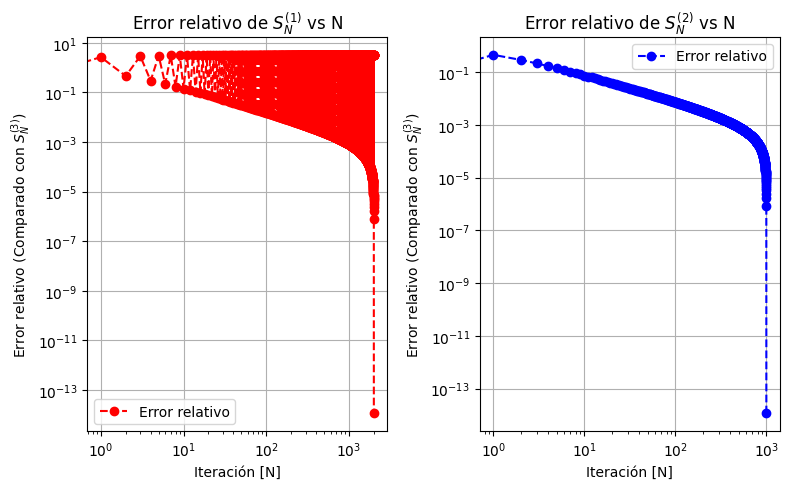

In [19]:
e1=np.zeros(2*n+1)
for i in range(1,2*n+1):
    e1[i]=np.abs((y1[i]-s3)/s3)

e2=np.zeros(n+1)
for k in range(1,n+1):
    e2[k]=np.abs((y2[k]-s3)/s3)

N=np.arange(0,n+1,1)
N1=np.arange(0,2*n+1,1)

fig,axes=plt.subplots(1,2,figsize=(8,5))

axes[0].loglog(N1,e1,'ro--',label='Error relativo')
axes[0].legend()
axes[0].grid()
axes[0].set_ylabel('Error relativo (Comparado con $S_N^{(3)}$)')
axes[0].set_xlabel('Iteración [N]')
axes[0].set_title('Error relativo de $S_N^{(1)}$ vs N')

axes[1].loglog(N,e2,'bo--',label='Error relativo')
axes[1].legend()
axes[1].grid()
axes[1].set_ylabel('Error relativo (Comparado con $S_N^{(3)}$)')
axes[1].set_xlabel('Iteración [N]')
axes[1].set_title('Error relativo de $S_N^{(2)}$ vs N')

plt.tight_layout()

Vemos que el error relativo va decayendo de manera abrupta a medida que N avanza bastante, tanto como para casi alcanzar la presición de la máquina. Sólo habría que darle valores mucho más altos que $N=1\times 10^{6}$